Imports

In [4]:
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import tensorflow as tf

import utils

np.set_printoptions(precision=2)


tf.get_logger().setLevel('ERROR')
tf.autograph.set_verbosity(0)

Regression

In [5]:
# load the dataset form the text file
data = np.loadtxt('./data/data_w3_ex1.csv', delimiter=',')

# split the inputs and outputs into seperate arrays
X=data[: ,0]
y=data[: , 1]

# convert 1-D arrays into 2-D because the commands later will reqiute it
x=np.expand_dims(X , axis=1)
y=np.expand_dims(y , axis=1)

print(f"the shape of the inputs x is: {x.shape}")
print(f"the shape of the targets y is: {y.shape}")

the shape of the inputs x is: (50, 1)
the shape of the targets y is: (50, 1)


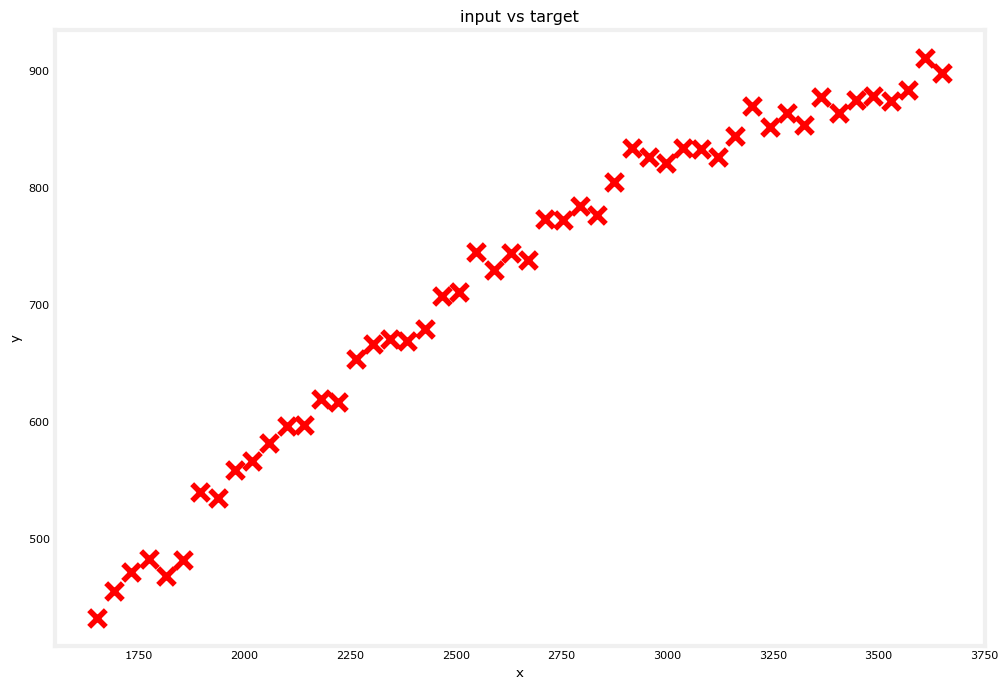

In [6]:
# plot the entire dataset
utils.plot_dataset(x=x , y=y , title="input vs target")

In [7]:
x_train , x_ , y_train , y_= train_test_split(x , y , test_size=0.40 , random_state=1)

x_cv , x_test , y_cv , y_test = train_test_split( x_ , y_ , test_size=0.50 , random_state=1)

del x_ , y_

print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")
print(f"the shape of the test set (input) is: {x_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (30, 1)
the shape of the training set (target) is: (30, 1)

the shape of the cross validation set (input) is: (10, 1)
the shape of the cross validation set (target) is: (10, 1)

the shape of the test set (input) is: (10, 1)
the shape of the test set (target) is: (10, 1)


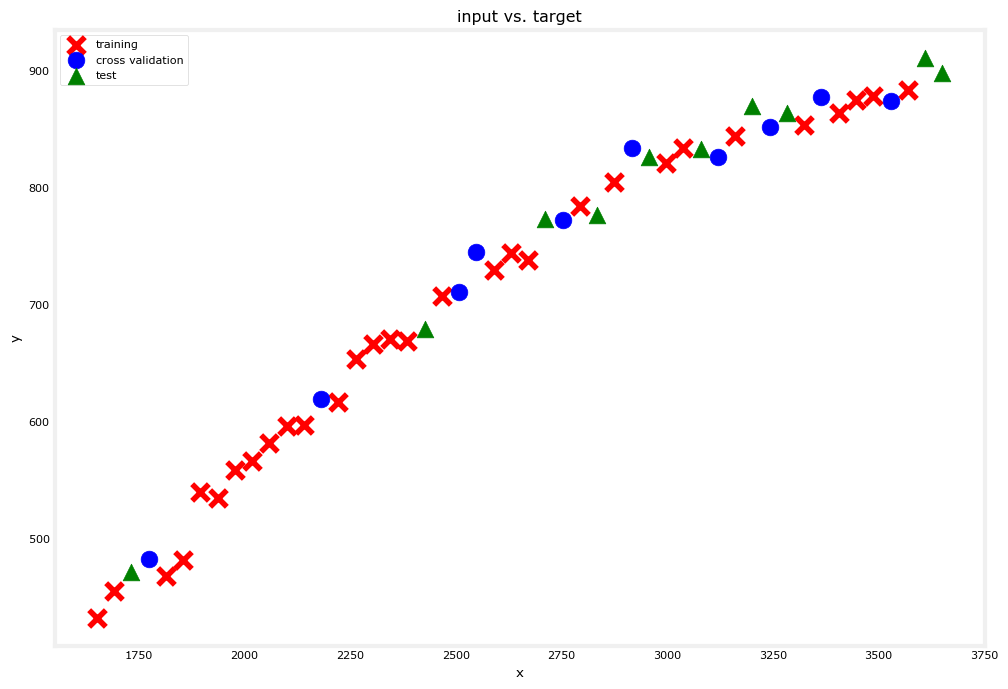

In [8]:
utils.plot_train_cv_test(x_train , y_train , x_cv , y_cv  , x_test , y_test , title="input vs target")

Feature scaling (z-score normailzation of data)

Computed mean of the training set: 2504.06
Computed standard deviation of the training set: 574.85


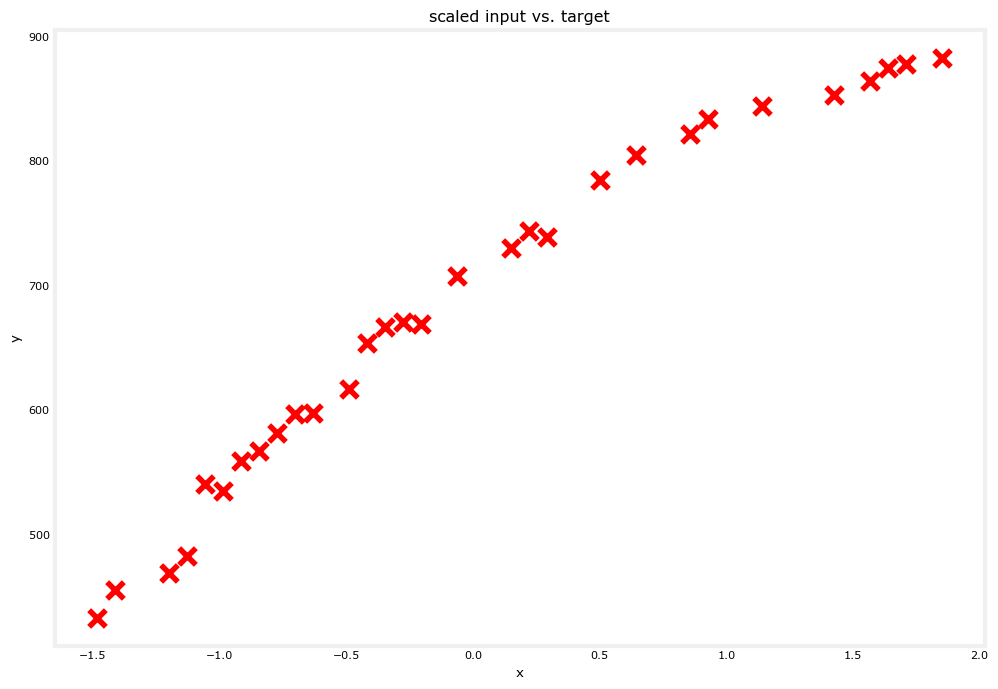

In [9]:
# initialize the class
scaler_linear=StandardScaler()

X_train_scaled = scaler_linear.fit_transform(x_train)

print(f"Computed mean of the training set: {scaler_linear.mean_.squeeze():.2f}")
print(f"Computed standard deviation of the training set: {scaler_linear.scale_.squeeze():.2f}")

# Plot the results
utils.plot_dataset(x=X_train_scaled, y=y_train, title="scaled input vs. target")

Train the model

In [10]:
# initialize the class
linear_model=LinearRegression()

linear_model.fit(X_train_scaled , y_train)

LinearRegression()

Evaluate the model

In [11]:
yhat=linear_model.predict(X_train_scaled)

print(f"training MSE (using sklearn function): {mean_squared_error(y_train , yhat)}")

total_squared_error=0

for i in range(len(yhat)):
    squared_error_i=(yhat[i] - y_train[i])**2
    total_squared_error+= squared_error_i

mse=total_squared_error/ (2*len(yhat))

print(f"training MSE (for-loop implementaion): {mse.squeeze()}")

training MSE (using sklearn function): 812.3874838506631
training MSE (for-loop implementaion): 406.19374192533155


In [12]:
# scale the cross validation set using the mean  and standard deviation of training set
X_cv_scaled = scaler_linear.transform(x_cv)

print(f"Mean used to scale to CV set: {scaler_linear.mean_.squeeze():.2f}")
print(f"Standard deviation used to scale the CV set: {scaler_linear.scale_.squeeze():.2f}")

yhat=linear_model.predict(X_cv_scaled)
print(f"Cross validation MSE: {mean_squared_error(y_cv, yhat) / 2}")

Mean used to scale to CV set: 2504.06
Standard deviation used to scale the CV set: 574.85
Cross validation MSE: 551.7789026952216


Adding polynomial Features

In [13]:
poly= PolynomialFeatures(degree=2 , include_bias=False)

X_train_mapped= poly.fit_transform(x_train)

print(X_train_mapped)

[[3.32e+03 1.11e+07]
 [2.34e+03 5.50e+06]
 [3.49e+03 1.22e+07]
 [2.63e+03 6.92e+06]
 [2.59e+03 6.71e+06]
 [1.81e+03 3.29e+06]
 [3.00e+03 8.99e+06]
 [2.22e+03 4.94e+06]
 [2.88e+03 8.27e+06]
 [2.06e+03 4.24e+06]
 [2.79e+03 7.81e+06]
 [3.45e+03 1.19e+07]
 [3.04e+03 9.23e+06]
 [2.39e+03 5.69e+06]
 [2.47e+03 6.09e+06]
 [2.67e+03 7.14e+06]
 [1.90e+03 3.59e+06]
 [1.94e+03 3.75e+06]
 [3.57e+03 1.27e+07]
 [1.69e+03 2.86e+06]
 [2.30e+03 5.31e+06]
 [1.65e+03 2.73e+06]
 [2.26e+03 5.12e+06]
 [1.86e+03 3.44e+06]
 [2.10e+03 4.41e+06]
 [2.02e+03 4.07e+06]
 [1.98e+03 3.91e+06]
 [2.14e+03 4.58e+06]
 [3.41e+03 1.16e+07]
 [3.16e+03 9.99e+06]]


In [14]:
scaler_ploy=StandardScaler()

X_train_mapped_scaled= scaler_ploy.fit_transform(X_train_mapped)

print(X_train_mapped_scaled[:5])

[[ 1.43  1.47]
 [-0.28 -0.36]
 [ 1.71  1.84]
 [ 0.22  0.11]
 [ 0.15  0.04]]


In [15]:
# initialize the class
model=LinearRegression()

model.fit(X_train_mapped_scaled, y_train)

yhat=model.predict(X_train_mapped_scaled)
print(f"training MSE: {mean_squared_error(y_train , yhat)/2}")

X_cv_mapped= poly.transform(x_cv)

X_cv_mapped_scaled= scaler_ploy.transform(X_cv_mapped)

yhat_cv=model.predict(X_cv_mapped_scaled)
print(f"crossvalidation mse: {mean_squared_error(y_cv , yhat_cv)/2}")

training MSE: 49.111609334025154
crossvalidation mse: 87.6984121111191


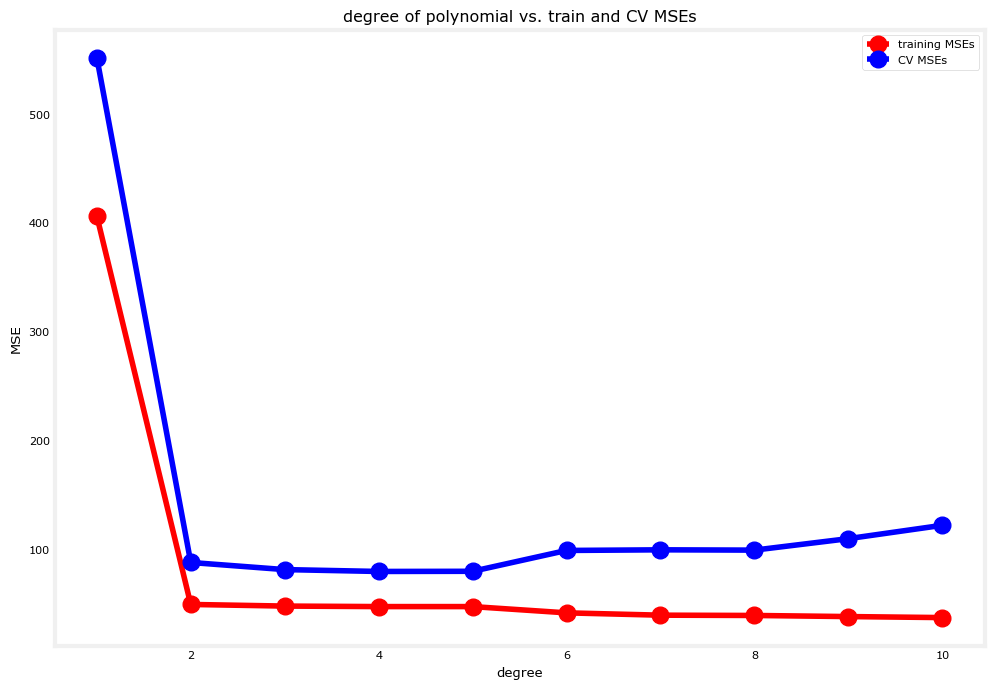

In [18]:
# initialize lists to save the errors , models  , and feature transforms

train_mses=[]
cv_mses=[]
models=[]
polys=[]
scalers=[]

for degree in range(1 , 11):

    # add polynomial fetures to the training set
    poly = PolynomialFeatures(degree, include_bias=False)
    X_train_mapped=poly.fit_transform(x_train)
    polys.append(poly)

    # scale the training set
    scaler_poly=StandardScaler()
    X_train_mapped_scaled=scaler_ploy.fit_transform(X_train_mapped)
    scalers.append(scaler_poly)

    # create and train the model
    model=LinearRegression()
    model.fit(X_train_mapped_scaled , y_train)
    models.append(model)

    # compute the training MSE
    yhat=model.predict(X_train_mapped_scaled)
    train_mse=mean_squared_error(y_train , yhat)/2
    train_mses.append(train_mse)

     # Add polynomial features and scale the cross validation set
    X_cv_mapped = poly.transform(x_cv)
    X_cv_mapped_scaled=scaler_ploy.transform(X_cv_mapped)
    
    # Compute the cross validation MSE
    yhat = model.predict(X_cv_mapped_scaled)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    cv_mses.append(cv_mse)


# Plot the results
degrees=range(1,11)
utils.plot_train_cv_mses(degrees, train_mses, cv_mses, title="degree of polynomial vs. train and CV MSEs")